## 鸢尾花数据集分类一、鸢尾花数据集分类

> 鸢尾花数据集以鸢尾花的特征作为数据来源，数据集包含150个数据集，有4维，分为3类（setosa、versicolour、virginica），每类50个数据，每个数据包含4个属性，花萼长度、宽度和花瓣长度、宽度

1. 选择分类

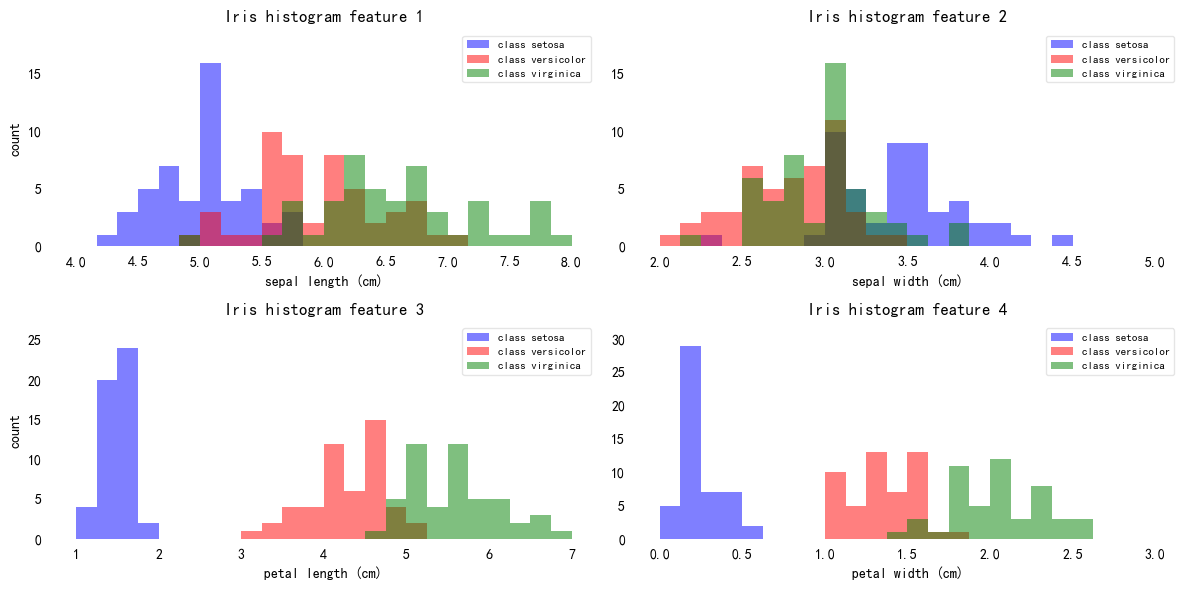

In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math

#prepare the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = iris.feature_names
labels = iris.target_names
y_c = np.unique(y)

"""visualize the distributions of the four different features in 1-dimensional histograms"""
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for ax, column in zip(axes.ravel(), range(X.shape[1])):
  # set bin sizes
  min_b = math.floor(np.min(X[:, column]))
  max_b = math.ceil(np.max(X[:, column]))
  bins = np.linspace(min_b, max_b, 25)

  # plotting the histograms
  for i, color in zip(y_c, ('blue', 'red', 'green')):
      ax.hist(X[y == i, column], color=color, label='class %s' % labels[i],
              bins=bins, alpha=0.5, )
  ylims = ax.get_ylim()

  # plot annotation
  l = ax.legend(loc='upper right', fancybox=True, fontsize=8)
  l.get_frame().set_alpha(0.5)
  ax.set_ylim([0, max(ylims) + 2])
  ax.set_xlabel(names[column])
  ax.set_title('Iris histogram feature %s' % str(column + 1))

  # hide axis ticks
  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                 labelbottom=True, labelleft=True)

  # remove axis spines
  ax.spines['top'].set_visible(False)
  ax.spines["right"].set_visible(False)
  ax.spines["bottom"].set_visible(False)
  ax.spines["left"].set_visible(False)

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')
fig.tight_layout()
plt.show()

由上图可以看出花瓣的长度和宽度更适合分类

2. 鸢尾花 数据集的Fisher分类

Mean Vector class 0:[5.006 3.428 1.462 0.246]

Mean Vector class 1:[5.936 2.77  4.26  1.326]

Mean Vector class 2:[6.588 2.974 5.552 2.026]

S_W:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
S_B:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


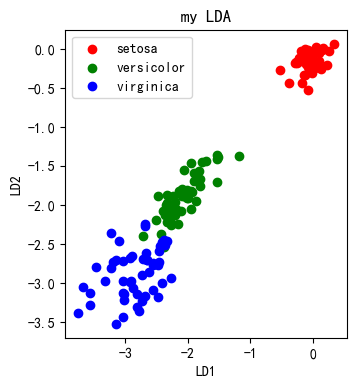

In [40]:
np.set_printoptions(precision=4)
 
mean_vector = []  # 类别的平均值
for i in y_c:
    mean_vector.append(np.mean(X[y == i], axis=0))
    print('Mean Vector class %s:%s\n' % (i, mean_vector[i]))
S_W = np.zeros((X.shape[1], X.shape[1]))
for i in y_c:
    Xi = X[y == i] - mean_vector[i]
    S_W += np.mat(Xi).T * np.mat(Xi)
print('S_W:\n', S_W)

S_B = np.zeros((X.shape[1], X.shape[1]))
mu = np.mean(X, axis=0)  # 所有样本平均值
for i in y_c:
    Ni = len(X[y == i])
    S_B += Ni * np.mat(mean_vector[i] - mu).T * np.mat(mean_vector[i] - mu)
print('S_B:\n', S_B) 
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W) * S_B)  # 求特征值，特征向量
np.testing.assert_array_almost_equal(np.mat(np.linalg.inv(S_W) * S_B) * np.mat(eigvecs[:, 0].reshape(4, 1)),
                                     eigvals[0] * np.mat(eigvecs[:, 0].reshape(4, 1)), decimal=6, err_msg='',
                                     verbose=True)
# sorting the eigenvectors by decreasing eigenvalues
eig_pairs = [(np.abs(eigvals[i]), eigvecs[:, i]) for i in range(len(eigvals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
W = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))   
X_trans = X.dot(W)
assert X_trans.shape == (150, 2) 
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X_trans[y == 0, 0], X_trans[y == 0, 1], c='r')
plt.scatter(X_trans[y == 1, 0], X_trans[y == 1, 1], c='g')
plt.scatter(X_trans[y == 2, 0], X_trans[y == 2, 1], c='b')
plt.title('my LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(labels, loc='best', fancybox=True) 

In [42]:
import matplotlib 
print(matplotlib.matplotlib_fname())

/home/seasonhpc/anaconda3/envs/tfgpu/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


3. 判断准确率

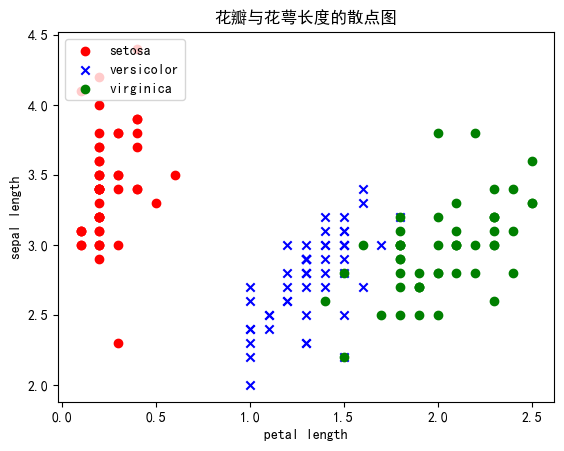

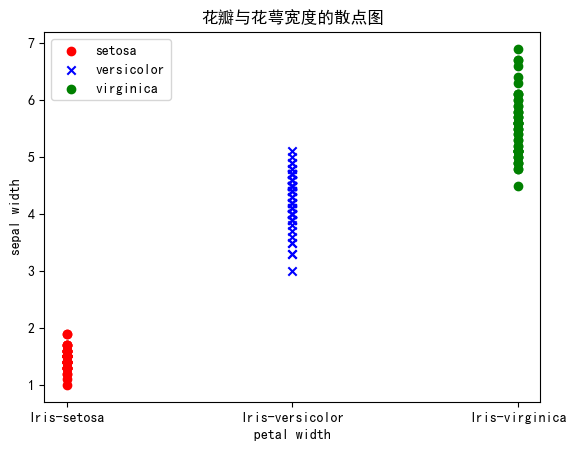

样本类内离散度矩阵S1： [[4.031480000000004 2.9498400000000005 0.5271200000000003
  0.46432000000000007]
 [2.9498400000000005 3.585719999999999 0.05895999999999962
  0.5625599999999998]
 [0.5271200000000003 0.05895999999999962 1.00128 0.16808000000000003]
 [0.46432000000000007 0.5625599999999998 0.16808000000000003 0.29488]] 

样本类内离散度矩阵S2： [[9.181679999999998 3.0413999999999977 5.8948000000000045
  1.7678800000000006]
 [3.0413999999999977 3.1389999999999993 2.514 1.3023999999999996]
 [5.8948000000000045 2.514 6.288000000000002 2.1768000000000005]
 [1.7678800000000006 1.3023999999999996 2.1768000000000005
  1.3170800000000003]] 

样本类内离散度矩阵S3： [[13.762319999999999 3.172359999999998 11.374480000000005
  1.2660399999999994]
 [3.172359999999998 3.2962799999999994 2.4840399999999994
  1.3869199999999993]
 [11.374480000000005 2.4840399999999994 11.468720000000005
  1.7695600000000002]
 [1.2660399999999994 1.3869199999999993 1.7695600000000002
  1.9098799999999994]] 

------------------------------------

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header = None)
Iris1=df.values[0:50,0:4]
Iris2=df.values[50:100,0:4]
Iris3=df.values[100:150,0:4]
m1=np.mean(Iris1,axis=0)
m2=np.mean(Iris2,axis=0)
m3=np.mean(Iris3,axis=0)
s1=np.zeros((4,4))
s2=np.zeros((4,4))
s3=np.zeros((4,4))
for i in range(0,30,1):
    a=Iris1[i,:]-m1
    a=np.array([a])
    b=a.T
    s1=s1+np.dot(b,a)    
for i in range(0,30,1):
    c=Iris2[i,:]-m2
    c=np.array([c])
    d=c.T
    s2=s2+np.dot(d,c) 
    #s2=s2+np.dot((Iris2[i,:]-m2).T,(Iris2[i,:]-m2))
for i in range(0,30,1):
    a=Iris3[i,:]-m3
    a=np.array([a])
    b=a.T
    s3=s3+np.dot(b,a) 
sw12=s1+s2
sw13=s1+s3
sw23=s2+s3
#投影方向
a=np.array([m1-m2])
sw12=np.array(sw12,dtype='float')
sw13=np.array(sw13,dtype='float')
sw23=np.array(sw23,dtype='float')
#判别函数以及T
#需要先将m1-m2转化成矩阵才能进行求其转置矩阵
a=m1-m2
a=np.array([a])
a=a.T
b=m1-m3
b=np.array([b])
b=b.T
c=m2-m3
c=np.array([c])
c=c.T
w12=(np.dot(np.linalg.inv(sw12),a)).T
w13=(np.dot(np.linalg.inv(sw13),b)).T
w23=(np.dot(np.linalg.inv(sw23),c)).T
#print(m1+m2) #1x4维度  invsw12 4x4维度  m1-m2 4x1维度
T12=-0.5*(np.dot(np.dot((m1+m2),np.linalg.inv(sw12)),a))
T13=-0.5*(np.dot(np.dot((m1+m3),np.linalg.inv(sw13)),b))
T23=-0.5*(np.dot(np.dot((m2+m3),np.linalg.inv(sw23)),c))
kind1=0
kind2=0
kind3=0
newiris1=[]
newiris2=[]
newiris3=[]
for i in range(30,49):
    x=Iris1[i,:]
    x=np.array([x])
    g12=np.dot(w12,x.T)+T12
    g13=np.dot(w13,x.T)+T13
    g23=np.dot(w23,x.T)+T23
    if g12>0 and g13>0:
        newiris1.extend(x)
        kind1=kind1+1
    elif g12<0 and g23>0:
        newiris2.extend(x)
    elif g13<0 and g23<0 :
        newiris3.extend(x)
#print(newiris1)
for i in range(30,49):
    x=Iris2[i,:]
    x=np.array([x])
    g12=np.dot(w12,x.T)+T12
    g13=np.dot(w13,x.T)+T13
    g23=np.dot(w23,x.T)+T23
    if g12>0 and g13>0:
        newiris1.extend(x)
    elif g12<0 and g23>0:
       
        newiris2.extend(x)
        kind2=kind2+1
    elif g13<0 and g23<0 :
        newiris3.extend(x)
for i in range(30,50):
    x=Iris3[i,:]
    x=np.array([x])
    g12=np.dot(w12,x.T)+T12
    g13=np.dot(w13,x.T)+T13
    g23=np.dot(w23,x.T)+T23
    if g12>0 and g13>0:
        newiris1.extend(x)
    elif g12<0 and g23>0:     
        newiris2.extend(x)
    elif g13<0 and g23<0 :
        newiris3.extend(x)
        kind3=kind3+1
#花瓣与花萼的长度散点图
plt.scatter(df.values[:50, 3], df.values[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(df.values[50:100, 3], df.values[50: 100, 1], color='blue', marker='x', label='versicolor')
plt.scatter(df.values[100:150, 3], df.values[100: 150, 1], color='green', label='virginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title("花瓣与花萼长度的散点图")
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.legend(loc='upper left')
plt.show()

#花瓣与花萼的宽度度散点图
plt.scatter(df.values[:50, 4], df.values[:50, 2], color='red', marker='o', label='setosa')
plt.scatter(df.values[50:100, 4], df.values[50: 100, 2], color='blue', marker='x', label='versicolor')
plt.scatter(df.values[100:150, 4], df.values[100: 150, 2], color='green', label='virginica')
plt.xlabel('petal width')
plt.ylabel('sepal width')
plt.title("花瓣与花萼宽度的散点图")
plt.legend(loc='upper left')
plt.show()

correct=(kind1+kind2+kind3)/60
print("样本类内离散度矩阵S1：",s1,'\n')
print("样本类内离散度矩阵S2：",s2,'\n')
print("样本类内离散度矩阵S3：",s3,'\n')
print('-----------------------------------------------------------------------------------------------')
print("总体类内离散度矩阵Sw12：",sw12,'\n')
print("总体类内离散度矩阵Sw13：",sw13,'\n')
print("总体类内离散度矩阵Sw23：",sw23,'\n')
print('-----------------------------------------------------------------------------------------------')
print('判断出来的综合正确率：',correct*100,'%')

可以看出准确为93%

# 二、可视化显示

## 1.用matplotlib绘制鸢尾花的三维数据

/home/seasonhpc/application/tmp/ipykernel_25835/2623877857.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


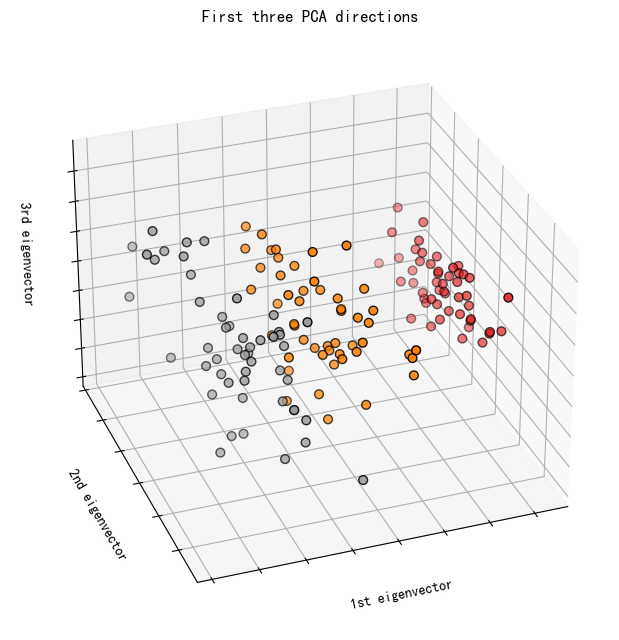

In [36]:
#用matplotlib绘制鸢尾花的三维数据
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
y = iris.target
X_reduced = PCA(n_components=3).fit_transform(iris.data)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],  # 三维数据
    c=y,  # 数据标签
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


## 2.绘制属性的二维关系图，（类似下图），观察属性和分类标签相关性

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_Iris = pd.read_csv('Iris.csv')
#对数据进行分割
df_Iris['Species']= df_Iris.Species.apply(lambda x: x.split('-')[1])
df_Iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/home/seasonhpc/anaconda3/envs/tfgpu/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


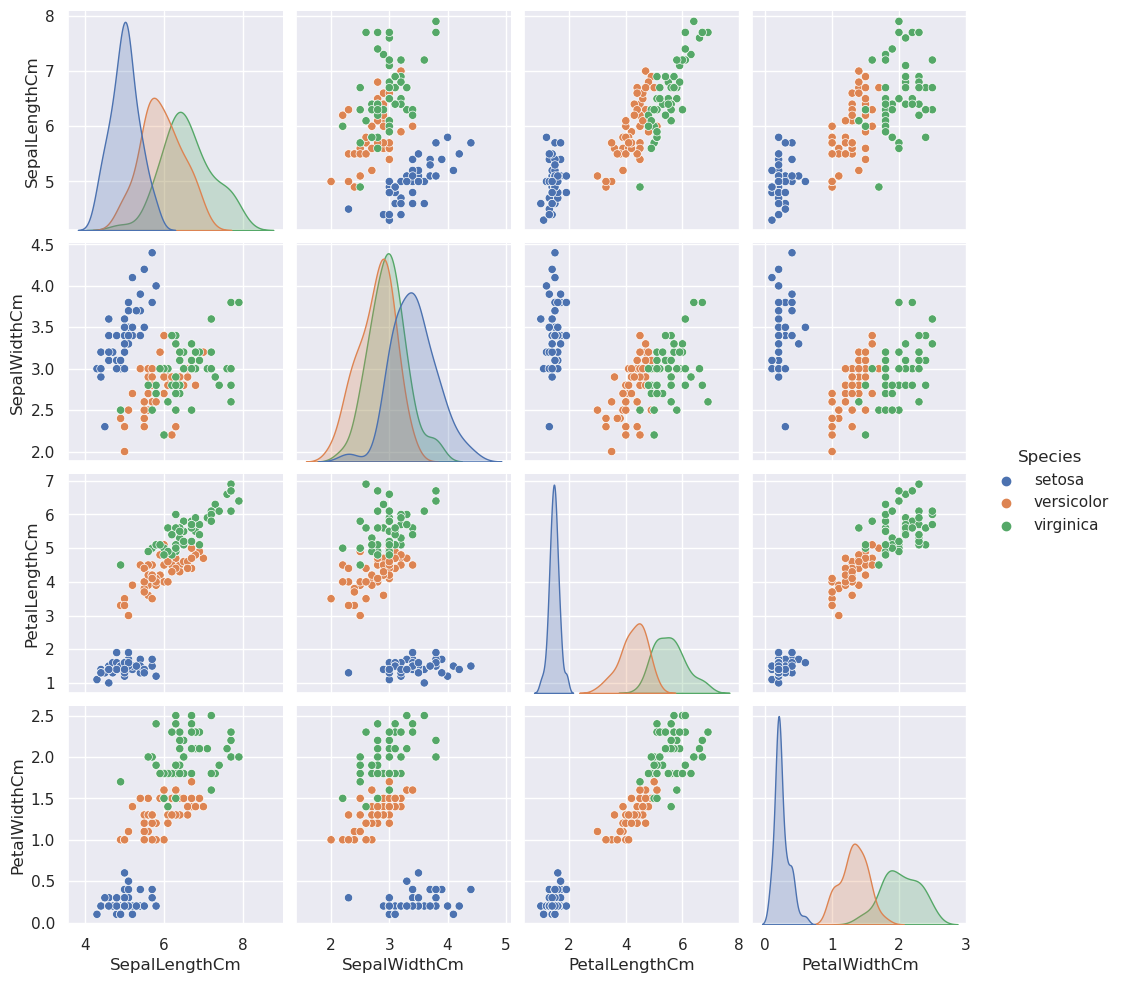

In [61]:
#sns初始化
sns.set()
#删除Id列
df_Iris.drop('Id',axis=1,inplace=True)
#绘制散点图
sns.pairplot(df_Iris,hue='Species',size=2.5)
plt.show()

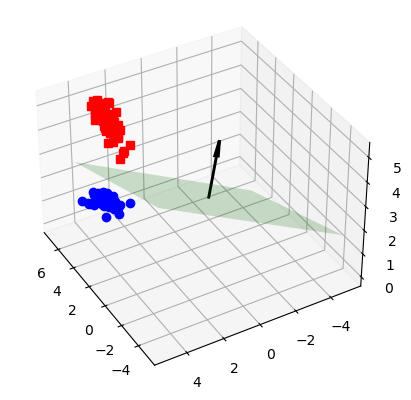

In [40]:
#对PetalLengthCm和PetalWidthCm绘制三维数据图

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = LogisticRegression()
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x,y,z(x,y),alpha=0.2,color='g')
#输出平面上一点
#ax.scatter(0,0,z(0,0),color='k',s=100)

#从平面上一点出发的一条平面法向量
ax.quiver(0,0,z(0,0),clf.coef_[0][0],clf.coef_[0][1],clf.coef_[0][2],length=0.8,color='k',linewidth=2.1)

ax.view_init(37, 150)

plt.show()

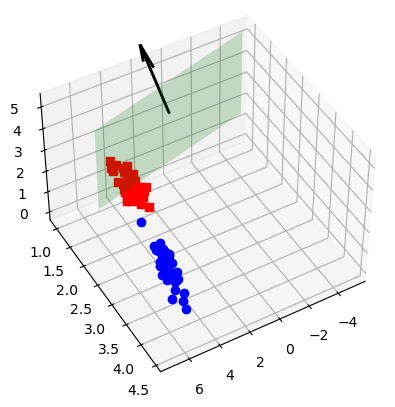

In [75]:
#随机梯度算法求z,如下即为分类较差的分类器
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x,1,z(x,y),alpha=0.2,color='g')

ax.quiver(0,1,z(0,1),clf.coef_[0][0],clf.coef_[0][1],clf.coef_[0][2],length=0.8,color='k',linewidth=2.1)

ax.view_init(45, 60)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df_Iris['Species']
#将数据按照8:2的比例随机分为训练集, 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#初始化决策树模型
dt = DecisionTreeClassifier()
#训练模型
dt.fit(X_train, y_train)
#用测试集评估模型的好坏
dt.score(X_test, y_test)